In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import sqlite3
import glob
from matplotlib import pyplot as plt

/Users/hari/.pyenv/versions/3.6.5/envs/covid/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [69]:
def plot_delta_scatter(country,xcol,ycol):
    conn = sqlite3.connect("covid.db")
    df_all = pd.read_sql("select * from daily where Country like '{0}'".format(country),conn)
    conn.close()
    df_all=df_all.sort_values('Date')
    df_plot=df_all[['Date','Confirmed','Deaths','Recovered']].fillna(0)
    df_plot['Infected'] = df_plot['Confirmed']-(df_plot['Recovered']-df_plot['Deaths'])
    df_plot[ycol]=df_plot[ycol] - df_plot[ycol].shift(1)
    df_plot[xcol]=df_plot[xcol] - df_plot[xcol].shift(1)
    plt.figure(figsize=(100,20))
    sns.set(style="whitegrid")
    sns.set_context("paper")
    c=sns.scatterplot(x=xcol,y=ycol,hue=xcol,data=df_plot,size=ycol,legend=False,sizes=(1000,5000))
    c.set_xlabel("Count",fontsize=30)
    c.set_ylabel("Date",fontsize=30)
    for item in c.get_xticklabels():
        item.set_rotation(90)
        item.set_size(30)
    for item in c.get_yticklabels():
        item.set_size(20)

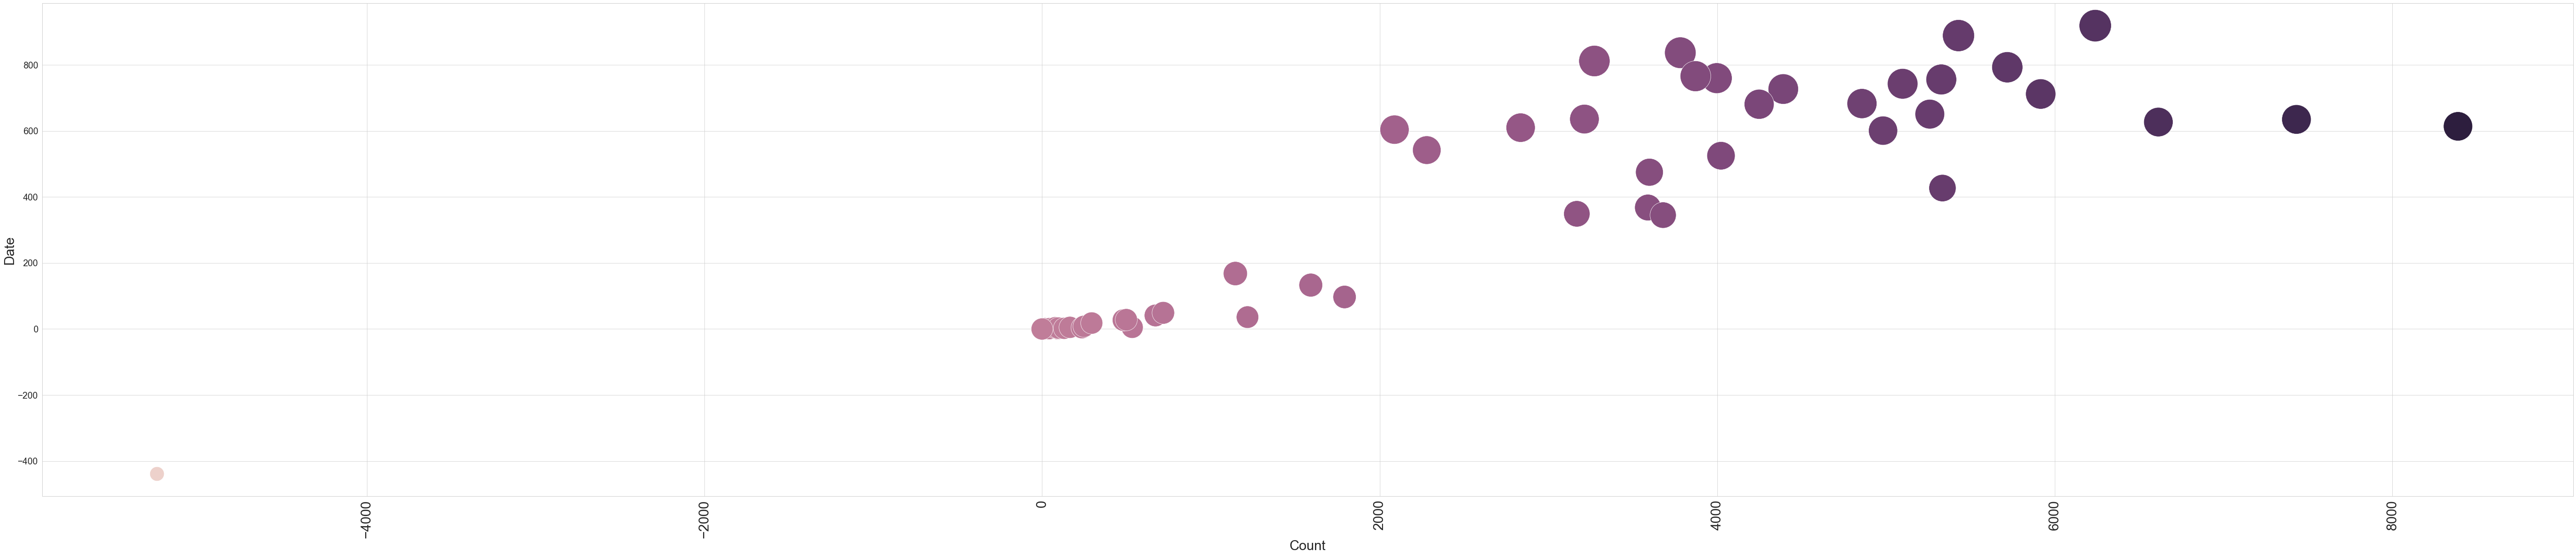

In [70]:
plot_delta_scatter('Italy','Infected','Deaths')